In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100

{1: 'MSFT', 2: 'MU', 3: 'INTC'}
Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.156 Seconds
Building M ...
	Done. Took 0.114 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 0.528 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) MSFT <-- MU: 4.284*(-0.018)^t + -3.893*(-0.009)^t + -3.036*(0.004)^t + 1.717*(0.068)^t + -19.996*(0.009)^t + -2.363*(-0.053)^t + 23.286236 * delta(t,0)
		RMSE = 0.018
		Matlab: [  4.28  -0.02  -3.89  -0.01  -3.04   0.     1.72   0.07 -20.     0.01  -2.36  -0.05]
	Done. Took 42.470 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) MSFT <-- INTC: -2.688*(-0.063)^t + -1.853*(0.176)^t + 3.156*(-0.056)^t + 9.314*(0.084)^t + 5.150*(0.068)^t + -2.793*(-0.106)^t + -10.285815 * delta(t,0)
		RMSE = 0.017
		Matlab: [-2.69 -0.06 -1.85  0.18  3.16 -0.06  9.31  0.08  5.15  0.07 -2.79 -0.11]
	

{0: {1: array([  4.28,  -0.02,  -3.89,  -0.01,  -3.04,   0.  ,   1.72,   0.07, -20.  ,   0.01,  -2.36,  -0.05]),
  2: array([-2.69, -0.06, -1.85,  0.18,  3.16, -0.06,  9.31,  0.08,  5.15,  0.07, -2.79, -0.11])},
 1: {0: array([ 3.72, -0.03, -0.62,  0.3 , -5.25,  0.02, -2.47,  0.12,  4.13,  0.07, -1.14,  0.03]),
  2: array([ -8.56,  -0.07,  -0.52,   0.06,  10.22,   0.06,   3.49,   0.2 ,  -6.79,   0.05,  -2.14,   0.09])},
 2: {0: array([ -1.5 ,  -0.  ,  -7.78,  -0.02, -12.29,   0.01,  -3.39,  -0.02,   0.52,  -0.03,   4.95,   0.03]),
  1: array([ -5.84,   0.01,  -0.53,  -0.02,   0.99,   0.31,  16.51,   0.08,  -3.11,   0.16,  -6.38,   0.14])}}

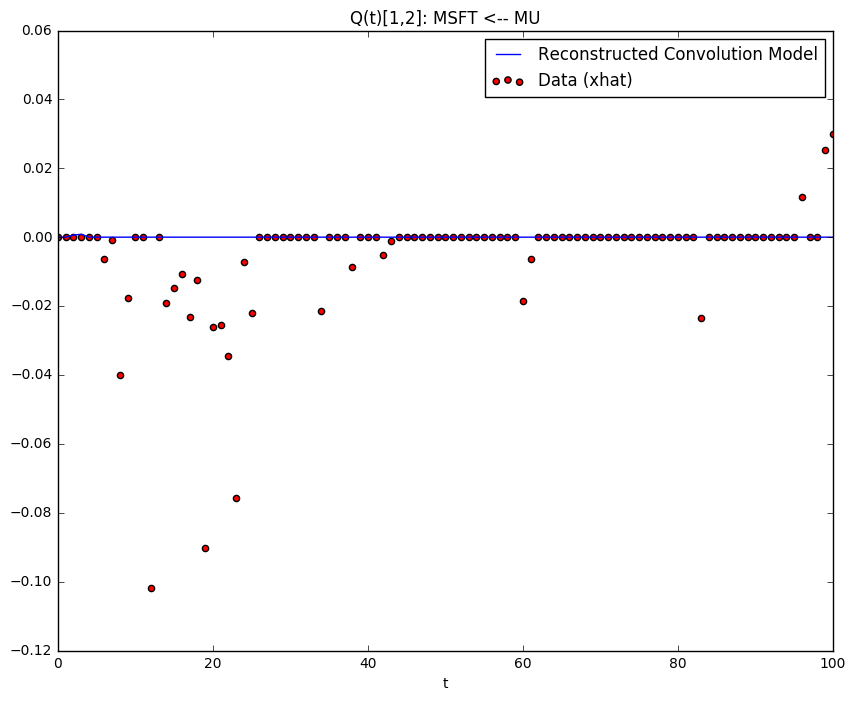

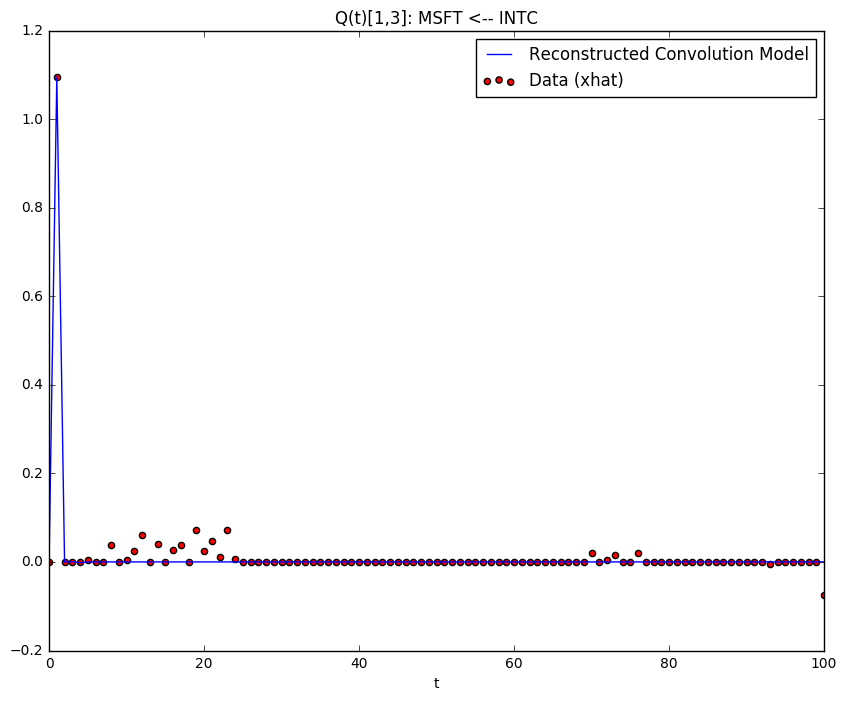

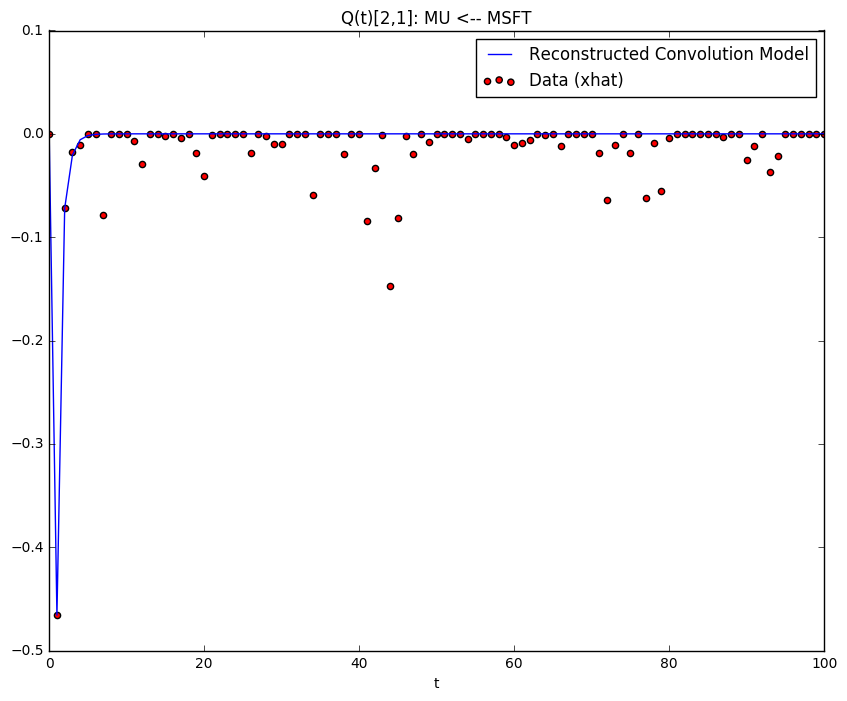

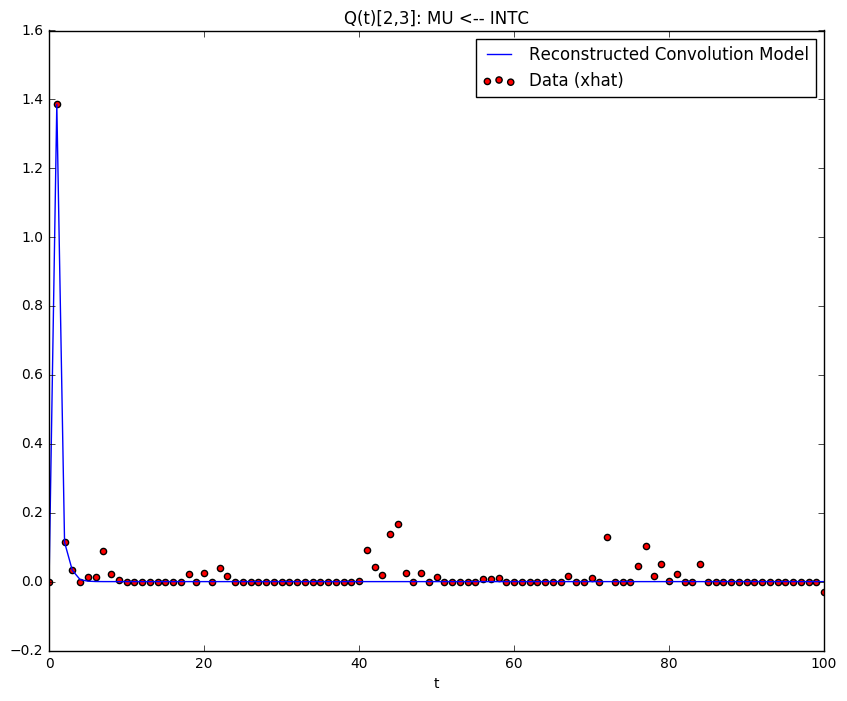

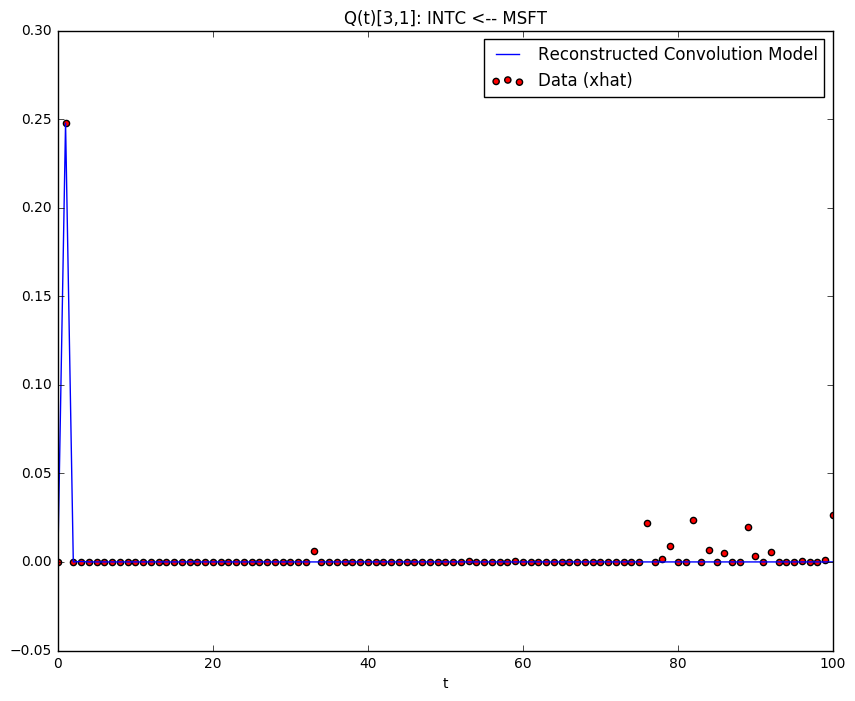

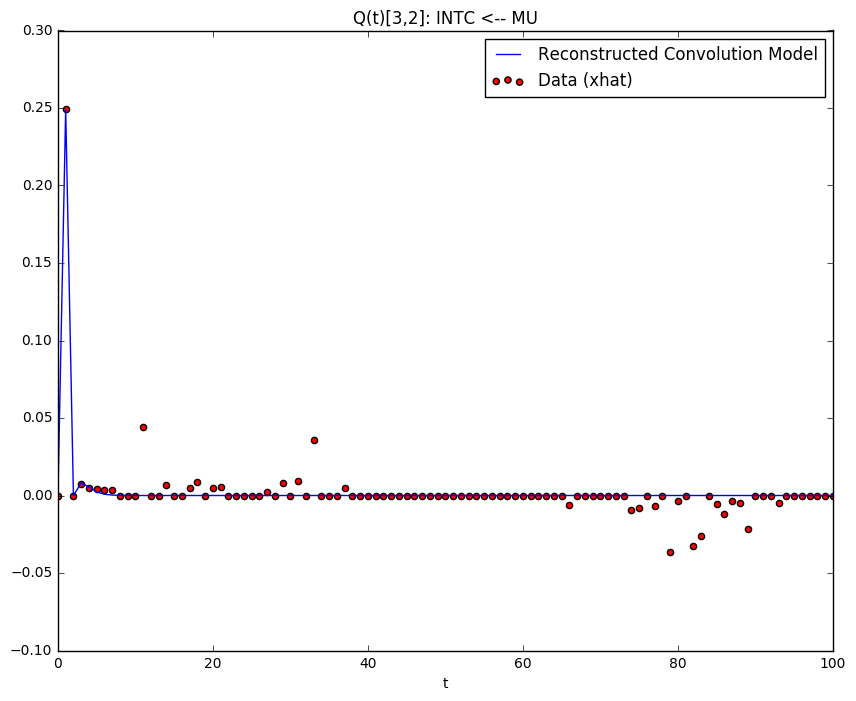

In [4]:
% matplotlib inline
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
cols = [col for col in y.columns if col != 'Date'][0:3]
y = y[cols].values
securities = cols

titles = {}
for i, col in enumerate(cols):
    titles[i + 1] = col
    
print(titles)

recon = Reconstructor(debug=True, r=R, bounds=20, order=6, robust=True)
recon.unmeasured(y, plot=True, titles=titles)  #, ij=(1,3))